In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

這是 Bag


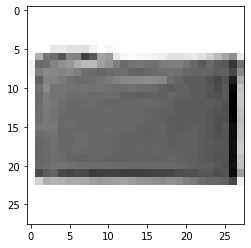

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');


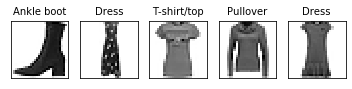

In [4]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [5]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  19,  66, 177, 159,
         75,  54, 128, 170,  47,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 210, 216, 196, 213, 240,
        137, 121, 253, 213, 188, 222, 187,  33,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 168, 191, 172, 174, 157, 173,
        196, 203, 185, 177, 185, 183, 198, 160,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 130, 200, 187, 177, 176, 179, 172,
        165, 168, 173, 173, 174, 183, 185, 191,  95,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  56, 182, 205, 174, 176, 177, 178,
        179, 177, 174, 214, 204, 179, 195, 177,  62,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  23, 222, 187, 163, 173, 178,
        179, 183, 173, 190, 181, 196, 200,  11,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
x_train=x_train.reshape(60000,784)/255
x_test=x_test.reshape(10000,784)/255

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [21]:
model = Sequential()
model.add(Dense(56, input_dim=784, activation='relu'))
model.add(Dense(38, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(loss='mse', optimizer=SGD(lr=0.025), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 56)                43960     
_________________________________________________________________
dense_4 (Dense)              (None, 38)                2166      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                390       
Total params: 46,516
Trainable params: 46,516
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, batch_size=50, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0831 - accuracy: 0.3371
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0628 - accuracy: 0.5241
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0479 - accuracy: 0.6793
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0411 - accuracy: 0.7265
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0370 - accuracy: 0.7579
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0342 - accuracy: 0.7771
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0321 - accuracy: 0.7905
Epoch 8/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0305 - accuracy: 0.8012
Epoch 9/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0293 - accuracy: 0.8077
Epoch 10/10
60

In [24]:
result = model.predict_classes(x_test)

神經網路預測是: Ankle boot


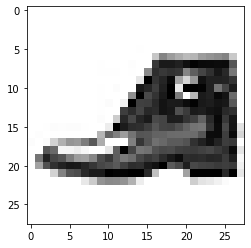

In [30]:
n = 8740
print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')